# Histogram Visualization

In [ ]:
import os
import pandas as pd

# 設定資料夾路徑
folder_path = 'D:/test/SAG_green_demo_board/B_csv_analysis/UT1_9_14_15'

# 列出資料夾中的所有檔案
file_names = [f for f in os.listdir(folder_path) if f.endswith('.csv')]

# 用來儲存所有資料框 (DataFrame) 的列表
data_frames = []

# 逐一讀取每個 CSV 檔案
for file_name in file_names:
    file_path = os.path.join(folder_path, file_name)
    df = pd.read_csv(file_path)
    data_frames.append(df)

# 合併所有資料框
all_data = pd.concat(data_frames, ignore_index=True)

# 顯示合併後的資料
print(all_data)


In [ ]:
import os
import pandas as pd

# 設定資料夾路徑
folder_path = 'D:/test/SAG_green_demo_board/B_csv_analysis/UT1_9_14_15'

# 列出資料夾中的所有檔案
file_names = [f for f in os.listdir(folder_path) if f.endswith('.csv')]

# 用來儲存每個檔案的最大 count 值
max_counts = []

# 逐一讀取每個 CSV 檔案
for file_name in file_names:
    file_path = os.path.join(folder_path, file_name)
    df = pd.read_csv(file_path)
    
    # 確保資料中包含 'count' 欄位
    if 'Count' in df.columns:
        max_count = df['Count'].max()  # 找出 'count' 欄位的最大值
        max_counts.append((file_name, max_count))  # 儲存檔案名稱與對應的最大值
    else:
        print(f"檔案 {file_name} 中找不到 'Count' 欄位。")

# 顯示每個檔案的最大 count 值
for file_name, max_count in max_counts:
    print(f"檔案 {file_name} 的最大 Count 值是: {max_count}")


In [ ]:
import os
import pandas as pd

# 設定資料夾路徑
folder_path = 'D:/test/SAG_green_demo_board/B_csv_analysis/UT1_9_14_15'

# 列出資料夾中的所有檔案
file_names = [f for f in os.listdir(folder_path) if f.endswith('.csv')]

# 用來儲存每個檔案的最大 count 值及其檔案名稱
max_counts = []
file_names_for_max_count = []

# 逐一讀取每個 CSV 檔案
for file_name in file_names:
    file_path = os.path.join(folder_path, file_name)
    df = pd.read_csv(file_path)
    
    # 確保資料中包含 'Count' 欄位
    if 'Count' in df.columns:
        max_count = df['Count'].max()  # 找出 'Count' 欄位的最大值
        max_counts.append(max_count)  # 儲存最大值
        file_names_for_max_count.append(file_name)  # 儲存對應檔案名稱
    else:
        print(f"檔案 {file_name} 中找不到 'Count' 欄位。")

# 找出最大值和最小值
if max_counts:
    overall_max = max(max_counts)  # 最大值
    overall_min = min(max_counts)  # 最小值

    # 找出最大值所在的檔案
    max_index = max_counts.index(overall_max)
    file_with_max_count = file_names_for_max_count[max_index]

    # 找出最小值所在的檔案
    min_index = max_counts.index(overall_min)
    file_with_min_count = file_names_for_max_count[min_index]

    # 顯示結果
    print(f"所有檔案中的最大 Count 值是: {overall_max}，來自檔案: {file_with_max_count}")
    print(f"所有檔案中的最小 Count 值是: {overall_min}，來自檔案: {file_with_min_count}")
else:
    print("沒有找到任何有效的 'Count' 欄位。")


In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import csv

# 設定資料夾路徑
folder_path = 'D:/test/SAG_green_demo_board/B_csv_analysis/UT1_9_14_15'

# 列出資料夾中的所有檔案
file_names = [f for f in os.listdir(folder_path) if f.endswith('.csv')]

# 用來儲存每個檔案的最大 count 值及其檔案名稱
max_counts = []
file_names_for_max_count = []

# 逐一讀取每個 CSV 檔案
for file_name in file_names:
    file_path = os.path.join(folder_path, file_name)
    df = pd.read_csv(file_path)
    
    # 確保資料中包含 'Count' 欄位
    if 'Count' in df.columns:
        max_count = df['Count'].max()  # 找出 'Count' 欄位的最大值
        max_counts.append(max_count)  # 儲存最大值
        file_names_for_max_count.append(file_name)  # 儲存對應檔案名稱
    else:
        print(f"檔案 {file_name} 中找不到 'Count' 欄位。")

# 繪製折線圖
if max_counts:
    # 設定圖表
    plt.figure(figsize=(10, 6))
    plt.plot(range(1, len(max_counts) + 1), max_counts, linestyle='-', color='b')

    # 設定標題與軸標籤
    plt.title('Max_count for each Files_index')
    plt.xlabel('Files_index')
    plt.ylabel('Max_count')

    # 顯示圖表
    plt.tight_layout()
    plt.show()

else:
    print("沒有找到任何有效的 'Count' 欄位。")


# Laplacian Variance

In [ ]:
import cv2
import os
import numpy as np
import csv

def calculate_laplacian_variance(image_path):
    # 讀取影像
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if image is None:
        print(f"無法讀取影像: {image_path}")
        return None
    
    # 計算 Laplacian，並計算 Laplacian 的方差
    laplacian = cv2.Laplacian(image, cv2.CV_64F)
    variance = laplacian.var()
    return variance

def process_images_in_folder(folder_path):
    # 取得資料夾內所有影像檔案
    image_files = [f for f in os.listdir(folder_path) if f.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp'))]
    
    # 計算每張影像的 Laplacian Variance
    variances = []
    for image_file in image_files:
        image_path = os.path.join(folder_path, image_file)
        variance = calculate_laplacian_variance(image_path)
        if variance is not None:
            variances.append([image_file, variance])
    
    return variances

def write_variances_to_csv(variances, output_csv):
    # 寫入 CSV 檔案
    with open(output_csv, mode='w', newline='', encoding='utf-8') as file:
        writer = csv.writer(file)
        writer.writerow(["Image Name", "Laplacian Variance"])  # 寫入標題行
        writer.writerows(variances)  # 寫入數據

# 需要處理的資料夾路徑
# folder_path = 'D:/test/SAG_green_demo_board/B'  # 替換成你的資料夾路徑
folder_path = 'D:/tsne_analysis/image/B'

# 計算並取得 Laplacian Variance
variances = process_images_in_folder(folder_path)

# 將結果寫入 CSV 檔案
output_csv = 'Laplacian_Variance.csv'
write_variances_to_csv(variances, output_csv)

print(f"結果已儲存至 {output_csv}")


# K-Means(Laplacian Variance)

In [ ]:
import cv2
import os
import numpy as np
import csv
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

def calculate_laplacian_variance(image_path):
    # 讀取影像
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if image is None:
        print(f"無法讀取影像: {image_path}")
        return None
    
    # 計算 Laplacian，並計算 Laplacian 的方差
    laplacian = cv2.Laplacian(image, cv2.CV_64F)
    variance = laplacian.var()
    return variance

def process_images_in_folder(folder_path):
    # 取得資料夾內所有影像檔案
    image_files = [f for f in os.listdir(folder_path) if f.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp'))]
    
    # 計算每張影像的 Laplacian Variance
    variances = []
    for image_file in image_files:
        image_path = os.path.join(folder_path, image_file)
        variance = calculate_laplacian_variance(image_path)
        if variance is not None:
            variances.append([image_file, variance])
    
    return variances

def apply_kmeans_to_variances(variances, num_clusters=3):
    # 提取 Laplacian Variance 的數據
    data = np.array([v[1] for v in variances]).reshape(-1, 1)

    # 使用 K-means 算法將 Laplacian Variance 分為 2 類
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    labels = kmeans.fit_predict(data)

    # 把每個影像和其對應的類別標註
    for i in range(len(variances)):
        variances[i].append(labels[i])
    
    return variances, kmeans

def write_variances_to_csv(variances, output_csv):
    # 寫入 CSV 檔案
    with open(output_csv, mode='w', newline='', encoding='utf-8') as file:
        writer = csv.writer(file)
        writer.writerow(["Image Name", "Laplacian Variance", "Cluster Label"])  # 寫入標題行
        writer.writerows(variances)  # 寫入數據

# 需要處理的資料夾路徑
folder_path = 'D:/tsne_analysis/image/B'

# 計算並取得 Laplacian Variance
variances = process_images_in_folder(folder_path)

# 使用 K-means 分類 Laplacian Variance
variances, kmeans = apply_kmeans_to_variances(variances)

# 將結果寫入 CSV 檔案
# output_csv = 'Laplacian_Variance_with_clusters.csv'
# write_variances_to_csv(variances, output_csv)
# print(f"結果已儲存至 {output_csv}")

# 可視化 K-means 結果（選擇性）
data = np.array([v[1] for v in variances]).reshape(-1, 1)
plt.scatter(data, np.zeros_like(data), c=kmeans.labels_, cmap='viridis', s=50)
plt.title("K-means Clustering of Laplacian Variance")
plt.xlabel("Laplacian Variance")
plt.show()


# K-Means(Laplacian Variance & Image Size)

In [ ]:
import cv2
import os
import numpy as np
import csv
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

def calculate_laplacian_variance(image_path):
    # 讀取影像
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if image is None:
        print(f"無法讀取影像: {image_path}")
        return None
    
    # 計算 Laplacian，並計算 Laplacian 的方差
    laplacian = cv2.Laplacian(image, cv2.CV_64F)
    variance = laplacian.var()
    return variance

def process_images_in_folder(folder_path):
    # 取得資料夾內所有影像檔案
    image_files = [f for f in os.listdir(folder_path) if f.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp'))]
    
    # 計算每張影像的 Laplacian Variance 和影像大小（寬度 * 高度）
    features = []
    for image_file in image_files:
        image_path = os.path.join(folder_path, image_file)
        
        # 計算 Laplacian Variance
        variance = calculate_laplacian_variance(image_path)
        if variance is None:
            continue
        
        # 取得影像尺寸 (寬度 * 高度)
        image = cv2.imread(image_path)
        height, width = image.shape[:2]
        size = width * height  # 使用圖像的寬高積作為大小指標
        
        features.append([image_file, variance, size])
    
    return features

def apply_kmeans_to_features(features, num_clusters=3):
    # 提取 Laplacian Variance 和 Image Size 作為特徵
    data = np.array([[f[1], f[2]] for f in features])  # 以 Laplacian Variance 和 Image Size 作為特徵

    # 使用 K-means 算法將特徵分為多個類別
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    labels = kmeans.fit_predict(data)

    # 把每個影像和其對應的類別標註
    for i in range(len(features)):
        features[i].append(labels[i])
    
    return features, kmeans, data

def write_features_to_csv(features, output_csv):
    # 寫入 CSV 檔案
    with open(output_csv, mode='w', newline='', encoding='utf-8') as file:
        writer = csv.writer(file)
        writer.writerow(["Image Name", "Laplacian Variance", "Image Size", "Cluster Label"])  # 寫入標題行
        writer.writerows(features)  # 寫入數據

# 需要處理的資料夾路徑
folder_path = 'D:/tsne_analysis/image/B'

# 計算並取得影像特徵
features = process_images_in_folder(folder_path)

# 使用 K-means 分類 Laplacian Variance 和 Image Size
features, kmeans, data = apply_kmeans_to_features(features)

# 將結果寫入 CSV 檔案
# output_csv = 'Laplacian_Variance_and_Size_with_clusters.csv'
# write_features_to_csv(features, output_csv)
# print(f"結果已儲存至 {output_csv}")

# 可視化 K-means 結果（Laplacian Variance 和 Image Size 在 2D 空間中）
plt.scatter(data[:, 0], data[:, 1], c=kmeans.labels_, cmap='viridis', s=50)
plt.title("K-means Clustering of Laplacian Variance and Image Size")
plt.xlabel("Laplacian Variance")
plt.ylabel


# 12978 Images

In [ ]:
import cv2
import os
import numpy as np
import csv
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

def calculate_laplacian_variance(image_path):
    # 讀取影像
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if image is None:
        print(f"無法讀取影像: {image_path}")
        return None
    
    # 計算 Laplacian，並計算 Laplacian 的方差
    laplacian = cv2.Laplacian(image, cv2.CV_64F)
    variance = laplacian.var()
    return variance

def process_images_in_folder(folder_path):
    # 取得資料夾內所有影像檔案
    image_files = [f for f in os.listdir(folder_path) if f.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp'))]
    
    # 計算每張影像的 Laplacian Variance
    variances = []
    for image_file in image_files:
        image_path = os.path.join(folder_path, image_file)
        variance = calculate_laplacian_variance(image_path)
        if variance is not None:
            variances.append([image_file, variance])
    
    return variances

def apply_kmeans_to_variances(variances, num_clusters=5):
    # 提取 Laplacian Variance 的數據
    data = np.array([v[1] for v in variances]).reshape(-1, 1)

    # 使用 K-means 算法將 Laplacian Variance 分為 2 類
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    labels = kmeans.fit_predict(data)

    # 把每個影像和其對應的類別標註
    for i in range(len(variances)):
        variances[i].append(labels[i])
    
    return variances, kmeans

def calculate_cluster_boundaries(variances, kmeans):
    # 根據 K-means 聚類的標籤來計算每個聚類的 Laplacian Variance 邊界（最小值和最大值）
    labels = kmeans.labels_
    
    # 創建一個字典來存儲每個聚類的 Laplacian Variance 範圍
    cluster_boundaries = {}

    for i in range(len(variances)):
        image_file, variance, cluster_label = variances[i]
        if cluster_label not in cluster_boundaries:
            cluster_boundaries[cluster_label] = {'min': variance, 'max': variance}
        else:
            cluster_boundaries[cluster_label]['min'] = min(cluster_boundaries[cluster_label]['min'], variance)
            cluster_boundaries[cluster_label]['max'] = max(cluster_boundaries[cluster_label]['max'], variance)

    # 輸出每個聚類的邊界
    for cluster_label, boundary in cluster_boundaries.items():
        print(f"Cluster {cluster_label}: Min Laplacian Variance = {boundary['min']}, Max Laplacian Variance = {boundary['max']}")

    return cluster_boundaries

# 假設 variances 已經包含了所有影像的 Laplacian Variance 和其聚類標籤
cluster_boundaries = calculate_cluster_boundaries(variances, kmeans)

def write_variances_to_csv(variances, output_csv):
    # 寫入 CSV 檔案
    with open(output_csv, mode='w', newline='', encoding='utf-8') as file:
        writer = csv.writer(file)
        writer.writerow(["Image Name", "Laplacian Variance", "Cluster Label"])  # 寫入標題行
        writer.writerows(variances)  # 寫入數據

# 需要處理的資料夾路徑
folder_path = 'D:/test/SAG_green_demo_board/B'

# 計算並取得 Laplacian Variance
variances = process_images_in_folder(folder_path)

# 使用 K-means 分類 Laplacian Variance
variances, kmeans = apply_kmeans_to_variances(variances)

# 將結果寫入 CSV 檔案
output_csv = 'Laplacian_Variance_with_clusters_12978.csv'
write_variances_to_csv(variances, output_csv)
print(f"結果已儲存至 {output_csv}")

# 可視化 K-means 結果（選擇性）
data = np.array([v[1] for v in variances]).reshape(-1, 1)
plt.scatter(data, np.zeros_like(data), c=kmeans.labels_, cmap='viridis', s=50)
plt.title("K-means Clustering of Laplacian Variance")
plt.xlabel("Laplacian Variance")
plt.show()

# 顯示每個聚類的中心（即每個聚類的 Laplacian Variance 平均值）
print("K-means Cluster Centers (Laplacian Variance):")
print(kmeans.cluster_centers_)


# K-Means: Square(10534), Circle(1684), Rect(760)

In [ ]:
import cv2
import os
import numpy as np
import csv
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

def calculate_laplacian_variance(image_path):
    # 讀取影像
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if image is None:
        print(f"無法讀取影像: {image_path}")
        return None
    
    # 計算 Laplacian，並計算 Laplacian 的方差
    laplacian = cv2.Laplacian(image, cv2.CV_64F)
    variance = laplacian.var()
    return variance

def process_images_in_folder(folder_path):
    # 取得資料夾內所有影像檔案
    image_files = [f for f in os.listdir(folder_path) if f.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp'))]
    
    # 計算每張影像的 Laplacian Variance
    variances = []
    for image_file in image_files:
        image_path = os.path.join(folder_path, image_file)
        variance = calculate_laplacian_variance(image_path)
        if variance is not None:
            variances.append([image_file, variance])
    
    return variances

def apply_kmeans_to_variances(variances, num_clusters=5):
    # 提取 Laplacian Variance 的數據
    data = np.array([v[1] for v in variances]).reshape(-1, 1)

    # 使用 K-means 算法將 Laplacian Variance 分為 2 類
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    labels = kmeans.fit_predict(data)

    # 把每個影像和其對應的類別標註
    for i in range(len(variances)):
        variances[i].append(labels[i])
    
    return variances, kmeans

def calculate_cluster_boundaries(variances, kmeans):
    # 根據 K-means 聚類的標籤來計算每個聚類的 Laplacian Variance 邊界（最小值和最大值）
    labels = kmeans.labels_
    
    # 創建一個字典來存儲每個聚類的 Laplacian Variance 範圍
    cluster_boundaries = {}

    for i in range(len(variances)):
        image_file, variance, cluster_label = variances[i]
        if cluster_label not in cluster_boundaries:
            cluster_boundaries[cluster_label] = {'min': variance, 'max': variance}
        else:
            cluster_boundaries[cluster_label]['min'] = min(cluster_boundaries[cluster_label]['min'], variance)
            cluster_boundaries[cluster_label]['max'] = max(cluster_boundaries[cluster_label]['max'], variance)

    # 輸出每個聚類的邊界，並將 Laplacian Variance 保留到小數點後兩位
    for cluster_label, boundary in cluster_boundaries.items():
        print(f"Cluster {cluster_label}: Min Laplacian Variance = {round(boundary['min'], 2)}, Max Laplacian Variance = {round(boundary['max'], 2)}")

    return cluster_boundaries

# 需要處理的資料夾路徑
folder_path = 'D:/test/SAG_green_demo_board/KMeans/B_circle'

# 計算並取得 Laplacian Variance
variances = process_images_in_folder(folder_path)

# 使用 K-means 分類 Laplacian Variance
variances, kmeans = apply_kmeans_to_variances(variances)

# 計算聚類的邊界
cluster_boundaries = calculate_cluster_boundaries(variances, kmeans)

# 可視化 K-means 結果（選擇性）
data = np.array([v[1] for v in variances]).reshape(-1, 1)
plt.scatter(data, np.zeros_like(data), c=kmeans.labels_, cmap='viridis', s=50)
plt.title("K-means Clustering of Laplacian Variance")
plt.xlabel("Laplacian Variance")
plt.show()

# 顯示每個聚類的中心（即每個聚類的 Laplacian Variance 平均值）
print("K-means Cluster Centers (Laplacian Variance):")
print(np.round(kmeans.cluster_centers_, 2))

# 如果需要，可以將結果寫入 CSV 文件
output_csv = 'Laplacian_Variance_with_clusters_circle.csv'
write_variances_to_csv(variances, output_csv)
print(f"結果已儲存至 {output_csv}")


# Piecewise Linear Regression

First peak (0-50): Intensity = 14.5, Count = 1237
Second peak (60-110): Intensity = 96.5, Count = 266


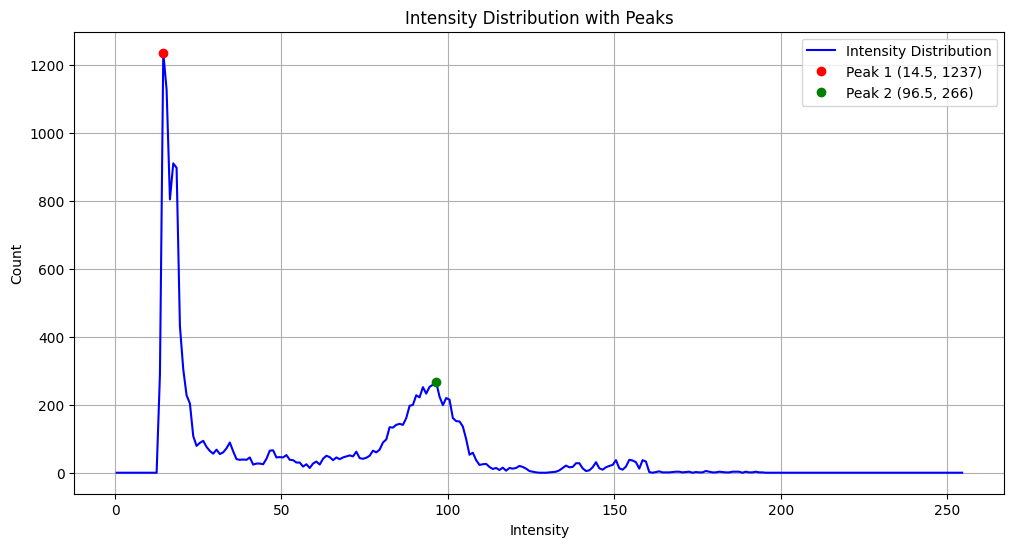

In [24]:
import numpy as np
from scipy.signal import find_peaks
import matplotlib.pyplot as plt

# 讀取CSV檔
df = pd.read_csv('D:/test/SAG_green_demo_board/B_csv_analysis/UT4_1_107_B.csv')

# 假設CSV檔中有兩欄資料，一欄是灰階值，另一欄是對應的數量
intensities = df['Intensity'].values  # 灰階值
counts = df['Count'].values      # 數量

# 將數據轉換為numpy陣列
intensities = np.array(intensities)
counts = np.array(counts)

# 在指定範圍內尋找波峰
def find_peak_in_range(intensities, counts, start, end):
    mask = (intensities >= start) & (intensities <= end)
    peak_index = np.argmax(counts[mask])
    peak_intensity = intensities[mask][peak_index]
    peak_count = counts[mask][peak_index]
    return peak_intensity, peak_count

# 在兩個範圍內尋找波峰
peak1_intensity, peak1_count = find_peak_in_range(intensities, counts, 0, 50)
peak2_intensity, peak2_count = find_peak_in_range(intensities, counts, 60, 110)

# 繪製圖表
plt.figure(figsize=(12, 6))
plt.plot(intensities, counts, 'b-', label='Intensity Distribution')
plt.plot(peak1_intensity, peak1_count, 'ro', label=f'Peak 1 ({peak1_intensity}, {peak1_count})')
plt.plot(peak2_intensity, peak2_count, 'go', label=f'Peak 2 ({peak2_intensity}, {peak2_count})')
plt.xlabel('Intensity')
plt.ylabel('Count')
plt.title('Intensity Distribution with Peaks')
plt.legend()
plt.grid(True)

# 輸出結果
print(f"First peak (0-50): Intensity = {peak1_intensity}, Count = {peak1_count}")
print(f"Second peak (60-110): Intensity = {peak2_intensity}, Count = {peak2_count}")

# 顯示圖表
plt.show()

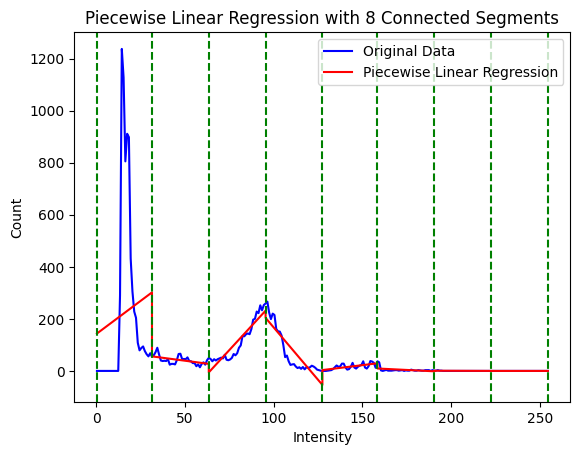

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# 读取 CSV 文件
df = pd.read_csv('D:/test/SAG_green_demo_board/B_csv_analysis/UT4_1_107_B.csv')

# 假设 CSV 文件中有 'Intensity' 和 'Count' 两列
intensities = df['Intensity'].values  # 灰阶值
counts = df['Count'].values      # 数量

# 确保 'Intensity' 和 'Count' 列的长度一致
assert len(intensities) == len(counts), "数据列长度不一致"

# 将数据转换为合适的格式
x = intensities.reshape(-1, 1)  # 需要将 x 转换为二维数组
y = counts

# 定义将数据分成8个区间并进行线性回归的函数
def piecewise_linear_regression(x, y, num_segments):
    # 计算断点
    breakpoints = np.linspace(0, len(x)-1, num_segments+1, dtype=int)
    segments = []

    # 对每个区间进行线性回归
    model = LinearRegression()
    for i in range(num_segments):
        start, end = breakpoints[i], breakpoints[i+1]
        x_segment = x[start:end+1]
        y_segment = y[start:end+1]
        model.fit(x_segment, y_segment)
        
        # 记录每段的回归线
        segments.append((x_segment, model.predict(x_segment)))

    return breakpoints, segments

# 使用Piecewise Linear Regression方法得到断点和回归线
num_segments = 8  # 设定我们要的段数
breakpoints, segments = piecewise_linear_regression(x, y, num_segments)

# 创建一个数组，包含所有分段线的拟合结果
x_fit = np.concatenate([segment[0] for segment in segments])  # 所有分段的x值
y_fit = np.concatenate([segment[1] for segment in segments])  # 所有分段的y值

# 绘制结果
plt.plot(x, y, label='Original Data', color='b')  # 原始数据
plt.plot(x_fit, y_fit, label='Piecewise Linear Regression', color='r')  # 连接后的线段

# 标记断点
for bp in breakpoints:
    plt.axvline(x=x[bp], color='g', linestyle='--')

plt.xlabel('Intensity')
plt.ylabel('Count')
plt.title('Piecewise Linear Regression with 8 Connected Segments')
plt.legend()
plt.show()


Piecewise线段端点坐标：
起始点: (0.5, 0), 结束点: (31.5, 55)
起始点: (31.5, 55), 结束点: (63.5, 50)
起始点: (63.5, 50), 结束点: (95.5, 259)
起始点: (95.5, 259), 结束点: (127.5, 0)
起始点: (127.5, 0), 结束点: (158.5, 37)
起始点: (158.5, 37), 结束点: (190.5, 1)
起始点: (190.5, 1), 结束点: (222.5, 0)
起始点: (222.5, 0), 结束点: (254.5, 0)


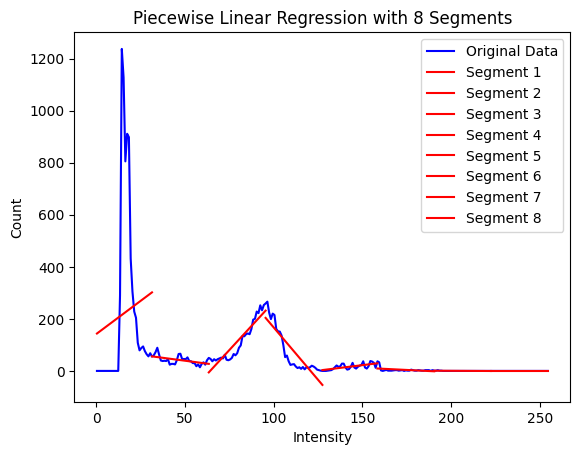

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# 读取 CSV 文件
df = pd.read_csv('D:/test/SAG_green_demo_board/B_csv_analysis/UT4_1_107_B.csv')

# 假设 CSV 文件中有 'Intensity' 和 'Count' 两列
intensities = df['Intensity'].values  # 灰阶值
counts = df['Count'].values      # 数量

# 确保 'Intensity' 和 'Count' 列的长度一致
assert len(intensities) == len(counts), "数据列长度不一致"

# 将数据转换为合适的格式
x = intensities.reshape(-1, 1)  # 需要将 x 转换为二维数组
y = counts

# 定义将数据分成8个区间并进行线性回归的函数
def piecewise_linear_regression(x, y, num_segments):
    # 计算断点
    breakpoints = np.linspace(0, len(x)-1, num_segments+1, dtype=int)
    segments = []
    piecewise_endpoints = []  # 用于保存每个分段的端点

    # 对每个区间进行线性回归
    model = LinearRegression()
    for i in range(num_segments):
        start, end = breakpoints[i], breakpoints[i+1]
        x_segment = x[start:end+1]
        y_segment = y[start:end+1]
        model.fit(x_segment, y_segment)
        
        # 记录每段的回归线
        segments.append((x_segment, model.predict(x_segment)))
        
        # 保存该段的端点坐标（起始点和结束点）
        piecewise_endpoints.append(((x_segment[0][0], y_segment[0]), (x_segment[-1][0], y_segment[-1])))

    return breakpoints, segments, piecewise_endpoints

# 使用Piecewise Linear Regression方法得到断点和回归线
num_segments = 8  # 设定我们要的段数
breakpoints, segments, piecewise_endpoints = piecewise_linear_regression(x, y, num_segments)

# 打印Piecewise线段的端点坐标
print("Piecewise线段端点坐标：")
for start_end in piecewise_endpoints:
    print(f"起始点: ({start_end[0][0]}, {start_end[0][1]}), 结束点: ({start_end[1][0]}, {start_end[1][1]})")

# 绘制结果
plt.plot(x, y, label='Original Data', color='b')  # 原始数据

# 单独绘制每个回归段的线并标记图例
for i, segment in enumerate(segments, start=1):
    plt.plot(segment[0], segment[1], label=f'Segment {i}', color='r')

plt.xlabel('Intensity')
plt.ylabel('Count')
plt.title('Piecewise Linear Regression with 8 Segments')
plt.legend()
plt.show()


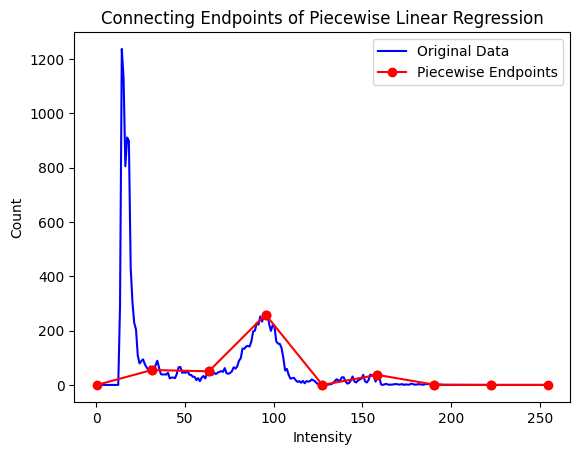

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# 读取 CSV 文件
df = pd.read_csv('D:/test/SAG_green_demo_board/B_csv_analysis/UT4_1_107_B.csv')

# 假设 CSV 文件中有 'Intensity' 和 'Count' 两列
intensities = df['Intensity'].values  # 灰阶值
counts = df['Count'].values      # 数量

# 确保 'Intensity' 和 'Count' 列的长度一致
assert len(intensities) == len(counts), "数据列长度不一致"

# 将数据转换为合适的格式
x = intensities.reshape(-1, 1)  # 需要将 x 转换为二维数组
y = counts

# 定义将数据分成8个区间并进行线性回归的函数
def piecewise_linear_regression(x, y, num_segments):
    # 计算断点
    breakpoints = np.linspace(0, len(x)-1, num_segments+1, dtype=int)
    segments = []
    piecewise_endpoints = []  # 用于保存每个分段的端点

    # 对每个区间进行线性回归
    model = LinearRegression()
    for i in range(num_segments):
        start, end = breakpoints[i], breakpoints[i+1]
        x_segment = x[start:end+1]
        y_segment = y[start:end+1]
        model.fit(x_segment, y_segment)
        
        # 记录每段的回归线
        segments.append((x_segment, model.predict(x_segment)))
        
        # 保存该段的端点坐标（起始点和结束点）
        piecewise_endpoints.append(((x_segment[0][0], y_segment[0]), (x_segment[-1][0], y_segment[-1])))

    return breakpoints, segments, piecewise_endpoints

# 使用Piecewise Linear Regression方法得到断点和回归线
num_segments = 8  # 设定我们要的段数
breakpoints, segments, piecewise_endpoints = piecewise_linear_regression(x, y, num_segments)

# 提取端点的坐标
endpoints_x = []
endpoints_y = []
for start_end in piecewise_endpoints:
    endpoints_x.extend([start_end[0][0], start_end[1][0]])  # 获取端点的x值
    endpoints_y.extend([start_end[0][1], start_end[1][1]])  # 获取端点的y值

# 绘制结果：直接连接端点
plt.plot(x, y, label='Original Data', color='b')  # 原始数据
plt.plot(endpoints_x, endpoints_y, label='Piecewise Endpoints', color='r', marker='o')  # 连接端点的线

plt.xlabel('Intensity')
plt.ylabel('Count')
plt.title('Connecting Endpoints of Piecewise Linear Regression')
plt.legend()
plt.show()


基于 AIC 的最佳分段数是: 19
基于 BIC 的最佳分段数是: 19


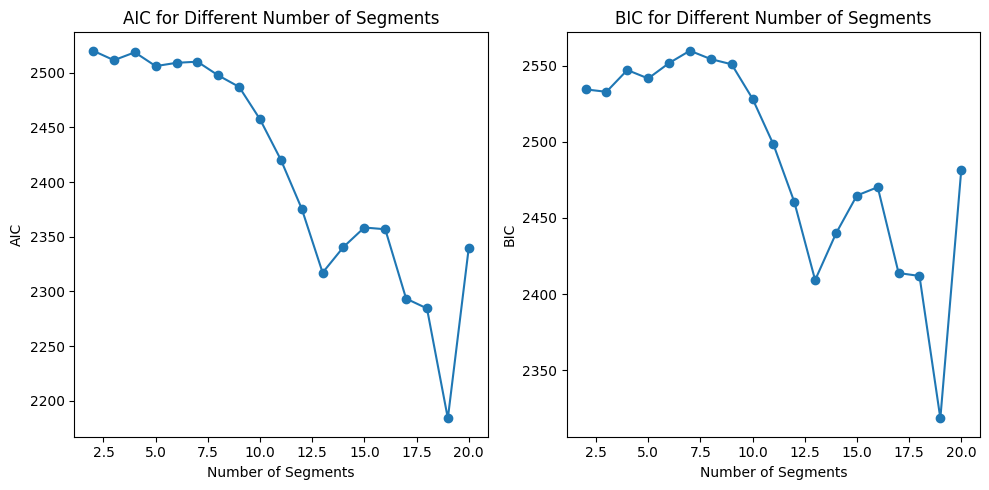

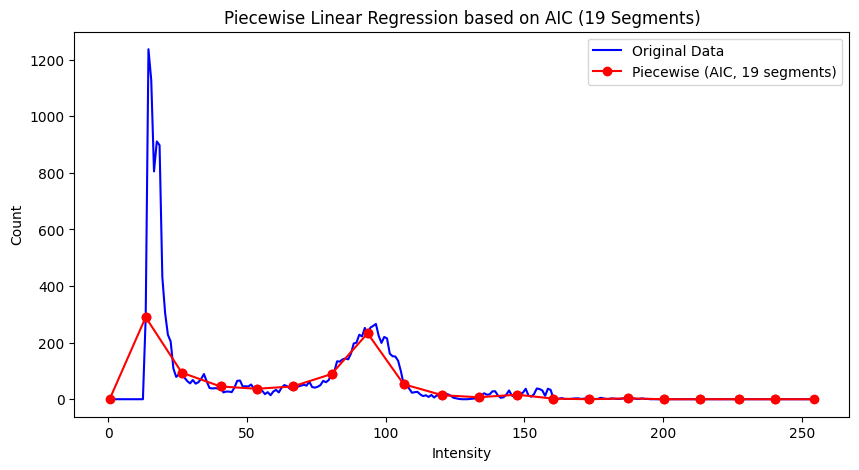

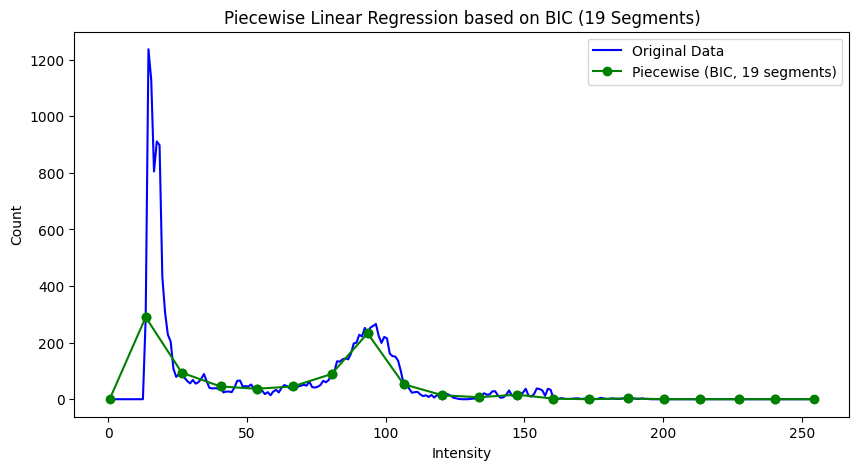

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# 读取 CSV 文件
df = pd.read_csv('D:/test/SAG_green_demo_board/B_csv_analysis/UT4_1_107_B.csv')

# 假设 CSV 文件中有 'Intensity' 和 'Count' 两列
intensities = df['Intensity'].values  # 灰阶值
counts = df['Count'].values      # 数量

# 确保 'Intensity' 和 'Count' 列的长度一致
assert len(intensities) == len(counts), "数据列长度不一致"

# 将数据转换为合适的格式
x = intensities.reshape(-1, 1)  # 需要将 x 转换为二维数组
y = counts

# 定义计算AIC和BIC的函数
def calculate_aic_bic(x, y, num_segments):
    # 计算断点
    breakpoints = np.linspace(0, len(x)-1, num_segments+1, dtype=int)
    segments = []
    model = LinearRegression()
    n = len(x)  # 样本大小
    k = 2  # 每个回归段的参数个数（线性回归有2个参数：斜率和截距）
    
    residual_sum_of_squares = 0

    # 对每个区间进行线性回归并计算残差平方和
    for i in range(num_segments):
        start, end = breakpoints[i], breakpoints[i+1]
        x_segment = x[start:end+1]
        y_segment = y[start:end+1]
        model.fit(x_segment, y_segment)
        
        # 计算该段的预测值
        y_pred = model.predict(x_segment)
        residual_sum_of_squares += np.sum((y_segment - y_pred) ** 2)  # 残差平方和

    # 计算 AIC 和 BIC
    aic = n * np.log(residual_sum_of_squares / n) + 2 * k * num_segments
    bic = n * np.log(residual_sum_of_squares / n) + k * num_segments * np.log(n)
    
    return aic, bic

# 使用AIC和BIC来选择最佳的分段数
segment_range = range(2, 21)  # 设定分段数的范围，例如 2 到 20
aic_values = []
bic_values = []

for num_segments in segment_range:
    aic, bic = calculate_aic_bic(x, y, num_segments)
    aic_values.append(aic)
    bic_values.append(bic)

# 找到具有最小AIC和BIC的分段数
best_num_segments_aic = segment_range[np.argmin(aic_values)]
best_num_segments_bic = segment_range[np.argmin(bic_values)]

# 打印最佳的分段数
print(f"基于 AIC 的最佳分段数是: {best_num_segments_aic}")
print(f"基于 BIC 的最佳分段数是: {best_num_segments_bic}")

# 画出不同分段数的 AIC 和 BIC 变化
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.plot(segment_range, aic_values, marker='o')
plt.xlabel('Number of Segments')
plt.ylabel('AIC')
plt.title('AIC for Different Number of Segments')

plt.subplot(1, 2, 2)
plt.plot(segment_range, bic_values, marker='o')
plt.xlabel('Number of Segments')
plt.ylabel('BIC')
plt.title('BIC for Different Number of Segments')

plt.tight_layout()
plt.show()

# 定义一个函数来执行Piecewise Linear Regression
def piecewise_linear_regression(x, y, num_segments):
    # 计算断点
    breakpoints = np.linspace(0, len(x)-1, num_segments+1, dtype=int)
    segments = []
    piecewise_endpoints = []  # 用于保存每个分段的端点

    # 对每个区间进行线性回归
    model = LinearRegression()
    for i in range(num_segments):
        start, end = breakpoints[i], breakpoints[i+1]
        x_segment = x[start:end+1]
        y_segment = y[start:end+1]
        model.fit(x_segment, y_segment)
        
        # 记录每段的回归线
        segments.append((x_segment, model.predict(x_segment)))
        
        # 保存该段的端点坐标（起始点和结束点）
        piecewise_endpoints.append(((x_segment[0][0], y_segment[0]), (x_segment[-1][0], y_segment[-1])))

    return breakpoints, segments, piecewise_endpoints

# 基于AIC和BIC分别进行piecewise回归并绘图
# AIC结果
breakpoints_aic, segments_aic, piecewise_endpoints_aic = piecewise_linear_regression(x, y, best_num_segments_aic)
# BIC结果
breakpoints_bic, segments_bic, piecewise_endpoints_bic = piecewise_linear_regression(x, y, best_num_segments_bic)

# 提取AIC的端点坐标
endpoints_x_aic = []
endpoints_y_aic = []
for start_end in piecewise_endpoints_aic:
    endpoints_x_aic.extend([start_end[0][0], start_end[1][0]])  # 获取端点的x值
    endpoints_y_aic.extend([start_end[0][1], start_end[1][1]])  # 获取端点的y值

# 提取BIC的端点坐标
endpoints_x_bic = []
endpoints_y_bic = []
for start_end in piecewise_endpoints_bic:
    endpoints_x_bic.extend([start_end[0][0], start_end[1][0]])  # 获取端点的x值
    endpoints_y_bic.extend([start_end[0][1], start_end[1][1]])  # 获取端点的y值

# 绘制AIC的Piecewise回归结果
plt.figure(figsize=(10, 5))
plt.plot(x, y, label='Original Data', color='b')  # 原始数据
plt.plot(endpoints_x_aic, endpoints_y_aic, label=f'Piecewise (AIC, {best_num_segments_aic} segments)', color='r', marker='o')  # AIC回归线

plt.xlabel('Intensity')
plt.ylabel('Count')
plt.title(f'Piecewise Linear Regression based on AIC ({best_num_segments_aic} Segments)')
plt.legend()
plt.show()

# 绘制BIC的Piecewise回归结果
plt.figure(figsize=(10, 5))
plt.plot(x, y, label='Original Data', color='b')  # 原始数据
plt.plot(endpoints_x_bic, endpoints_y_bic, label=f'Piecewise (BIC, {best_num_segments_bic} segments)', color='g', marker='o')  # BIC回归线

plt.xlabel('Intensity')
plt.ylabel('Count')
plt.title(f'Piecewise Linear Regression based on BIC ({best_num_segments_bic} Segments)')
plt.legend()
plt.show()
